In [1]:
from Capstone_Group4_Utility import genre_countplot, pieplot, clean_tags

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
plt.style.use('seaborn-poster')
df = pd.read_csv('anime.csv')
from collections import Counter

In [3]:
df.head()

,title,mediaType,eps,duration,ongoing,startYr,finishYr,sznOfRelease,description,studios,tags,contentWarn,watched,watching,wantWatch,dropped,rating,votes
0,Fullmetal Alchemist: Brotherhood,TV,64.0,NaN,False,2009.0,2010.0,Spring,The foundation of alchemy is based on the law ...,['Bones'],"['Action', 'Adventure', 'Drama', 'Fantasy', 'M...","['Animal Abuse', 'Mature Themes', 'Violence', ...",103707.0,14351,25810,2656,4.702,86547.0
1,your name.,Movie,1.0,107.0,False,2016.0,2016.0,NaN,Mitsuha and Taki are two total strangers livin...,['CoMix Wave Films'],"['Drama', 'Romance', 'Body Swapping', 'Gender ...",[],58831.0,1453,21733,124,4.663,43960.0
2,A Silent Voice,Movie,1.0,130.0,False,2016.0,2016.0,NaN,"After transferring into a new school, a deaf g...",['Kyoto Animation'],"['Drama', 'Shounen', 'Disability', 'Melancholy...","['Bullying', 'Mature Themes', 'Suicide']",45892.0,946,17148,132,4.661,33752.0
3,Haikyuu!! Karasuno High School vs Shiratorizaw...,TV,10.0,NaN,False,2016.0,2016.0,Fall,"Picking up where the second season ended, the ...",['Production I.G'],"['Shounen', 'Sports', 'Animeism', 'School Club...",[],25134.0,2183,8082,167,4.660,17422.0
4,Attack on Titan 3rd Season: Part II,TV,10.0,NaN,False,2019.0,2019.0,Spring,The battle to retake Wall Maria begins now! Wi...,['Wit Studio'],"['Action', 'Fantasy', 'Horror', 'Shounen', 'Da...","['Cannibalism', 'Explicit Violence']",21308.0,3217,7864,174,4.650,15789.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14578 entries, 0 to 14577
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         14578 non-null  object 
 1   mediaType     14510 non-null  object 
 2   eps           14219 non-null  float64
 3   duration      9137 non-null   float64
 4   ongoing       14578 non-null  bool   
 5   startYr       14356 non-null  float64
 6   finishYr      14134 non-null  float64
 7   sznOfRelease  3767 non-null   object 
 8   description   8173 non-null   object 
 9   studios       14578 non-null  object 
 10  tags          14578 non-null  object 
 11  contentWarn   14578 non-null  object 
 12  watched       14356 non-null  float64
 13  watching      14578 non-null  int64  
 14  wantWatch     14578 non-null  int64  
 15  dropped       14578 non-null  int64  
 16  rating        12107 non-null  float64
 17  votes         12119 non-null  float64
dtypes: bool(1), float64(7), in

### Data Pipline

#### Missing value

In [5]:
for col in df.columns:
    pct_missing = df[col].isnull().sum()/len(df[col])
    print('{}-{}%'.format(col, round(pct_missing*100,2)))

title-0.0%
mediaType-0.47%
eps-2.46%
duration-37.32%
ongoing-0.0%
startYr-1.52%
finishYr-3.05%
sznOfRelease-74.16%
description-43.94%
studios-0.0%
tags-0.0%
contentWarn-0.0%
watched-1.52%
watching-0.0%
wantWatch-0.0%
dropped-0.0%
rating-16.95%
votes-16.87%


In [6]:
df.describe(include='all')

,title,mediaType,eps,duration,ongoing,startYr,finishYr,sznOfRelease,description,studios,tags,contentWarn,watched,watching,wantWatch,dropped,rating,votes
count,14578,14510,14219.000000,9137.000000,14578,14356.000000,14134.000000,3767,8173,14578,14578,14578,14356.000000,14578.000000,14578.000000,14578.000000,12107.000000,12119.000000
unique,14578,8,NaN,NaN,2,NaN,NaN,4,8108,864,9580,178,NaN,NaN,NaN,NaN,NaN,NaN
top,Dou Long Zhanshi 3,TV,NaN,NaN,False,NaN,NaN,Spring,The films will follow The First Summer of Love...,[],[],[],NaN,NaN,NaN,NaN,NaN,NaN
freq,1,4510,NaN,NaN,14356,NaN,NaN,1202,3,4808,385,13149,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,13.501231,23.465142,NaN,2005.457788,2005.515919,NaN,NaN,NaN,NaN,NaN,2408.043396,213.026684,1021.729112,125.963026,2.948697,2085.787771
std,NaN,NaN,62.262185,30.777048,NaN,14.707105,14.656509,NaN,NaN,NaN,NaN,NaN,7168.368428,1261.707640,2145.010604,453.577348,0.827642,5946.283685
min,NaN,NaN,1.000000,1.000000,NaN,1907.000000,1907.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.844000,10.000000
25%,NaN,NaN,1.000000,3.000000,NaN,2000.000000,2000.000000,NaN,NaN,NaN,NaN,NaN,25.000000,1.000000,24.000000,1.000000,2.303500,34.000000
50%,NaN,NaN,1.000000,8.000000,NaN,2010.000000,2010.000000,NaN,NaN,NaN,NaN,NaN,165.000000,7.000000,175.000000,7.000000,2.965000,218.000000
75%,NaN,NaN,12.000000,29.000000,NaN,2016.000000,2016.000000,NaN,NaN,NaN,NaN,NaN,1469.500000,63.000000,980.000000,40.000000,3.615500,1412.500000


Due to more than 40% missing values in the sznofrelease and description columns, we decided to delete these two variables directly.

In [7]:
df=df.drop(['sznOfRelease','description'],axis=1)

In [8]:
df=df.dropna(subset=['mediaType'])

In [9]:
df.isna().sum()

title             0
mediaType         0
eps             359
duration       5414
ongoing           0
startYr         222
finishYr        442
studios           0
tags              0
contentWarn       0
watched         220
watching          0
wantWatch         0
dropped           0
rating         2466
votes          2454
dtype: int64

In [10]:
df.groupby('mediaType')['duration'].mean()

mediaType
DVD Special    10.921123
Movie          55.800094
Music Video     3.824316
OVA            31.735676
Other           6.733529
TV              7.358053
TV Special     45.060976
Web             6.811047
Name: duration, dtype: float64

In [11]:
df.groupby('mediaType').count()

,title,eps,duration,ongoing,startYr,finishYr,studios,tags,contentWarn,watched,watching,wantWatch,dropped,rating,votes
mediaType,,,,,,,,,,,,,,,
DVD Special,849,846,748,849,849,843,849,849,849,843,849,849,849,803,804
Movie,2512,2418,2136,2512,2473,2473,2512,2512,2512,2512,2512,2512,2512,1928,1930
Music Video,1596,1596,1571,1596,1593,1593,1596,1596,1596,1596,1596,1596,1596,1291,1292
OVA,2097,2081,1309,2097,2079,2069,2097,2097,2097,2087,2097,2097,2097,1770,1772
Other,782,721,683,782,720,707,782,782,782,769,782,782,782,583,584
TV,4510,4358,863,4510,4437,4343,4510,4510,4510,4416,4510,4510,4510,3993,3997
TV Special,609,608,410,609,609,605,609,609,609,605,609,609,609,504,504
Web,1555,1523,1376,1555,1528,1435,1555,1555,1555,1462,1555,1555,1555,1172,1173


Check each category whether has missing values. We found each category has missing values, so we used each category of mediaType to fill duration missing values by using each mean.

In [12]:
mask = (df['mediaType']=='DVD Special')
mean = df.loc[mask, 'duration'].mean()
df.loc[mask, 'duration'] = df.loc[mask, 'duration'].fillna(mean)

In [13]:
mask1 = (df['mediaType']=='Movie')
mean1 = df.loc[mask1, 'duration'].mean()
df.loc[mask1, 'duration'] = df.loc[mask1, 'duration'].fillna(mean1)

In [14]:
mask2 = (df['mediaType']=='Music Video')
mean2 = df.loc[mask1, 'duration'].mean()
df.loc[mask2, 'duration'] = df.loc[mask2, 'duration'].fillna(mean2)

In [15]:
mask3 = (df['mediaType']=='OVA')
mean3 = df.loc[mask1, 'duration'].mean()
df.loc[mask3, 'duration'] = df.loc[mask3, 'duration'].fillna(mean3)

In [16]:
mask4 = (df['mediaType']=='Other')
mean4 = df.loc[mask4, 'duration'].mean()
df.loc[mask4, 'duration'] = df.loc[mask4, 'duration'].fillna(mean4)

In [17]:
mask5 = (df['mediaType']=='TV')
mean5 = df.loc[mask5, 'duration'].mean()
df.loc[mask5, 'duration'] = df.loc[mask5, 'duration'].fillna(mean5)

In [18]:
mask6 = (df['mediaType']=='TV Special')
mean6 = df.loc[mask6, 'duration'].mean()
df.loc[mask6, 'duration'] = df.loc[mask6, 'duration'].fillna(mean6)

In [19]:
mask7 = (df['mediaType']=='Web')
mean7 = df.loc[mask7, 'duration'].mean()
df.loc[mask7, 'duration'] = df.loc[mask7, 'duration'].fillna(mean7)

In [20]:
df.isna().sum()

title             0
mediaType         0
eps             359
duration          0
ongoing           0
startYr         222
finishYr        442
studios           0
tags              0
contentWarn       0
watched         220
watching          0
wantWatch         0
dropped           0
rating         2466
votes          2454
dtype: int64

In [21]:
df.studios=df.studios.str.replace('[','').str.replace(']','').str.replace('\'','')

In [22]:
df.tags=df.tags.str.replace('[','').str.replace(']','').str.replace('\'','')

In [23]:
df.contentWarn=df.contentWarn.str.replace('[','').str.replace(']','').str.replace('\'','')

In [24]:
df.replace('',np.nan, inplace=True)

In [25]:
df.isna().sum()

title              0
mediaType          0
eps              359
duration           0
ongoing            0
startYr          222
finishYr         442
studios         4781
tags             385
contentWarn    13086
watched          220
watching           0
wantWatch          0
dropped            0
rating          2466
votes           2454
dtype: int64

In [26]:
for col in df.columns:
    pct_missing = df[col].isnull().sum()/len(df[col])
    print('{}-{}%'.format(col, round(pct_missing*100,2)))

title-0.0%
mediaType-0.0%
eps-2.47%
duration-0.0%
ongoing-0.0%
startYr-1.53%
finishYr-3.05%
studios-32.95%
tags-2.65%
contentWarn-90.19%
watched-1.52%
watching-0.0%
wantWatch-0.0%
dropped-0.0%
rating-17.0%
votes-16.91%


In [27]:
df.contentWarn=df.contentWarn.fillna('Health')

There are no warning in the blank cells of contentwarn, so we put health value in the empty cells of this variables.

In [28]:
for col in df.columns:
    pct_missing = df[col].isnull().sum()/len(df[col])
    print('{}-{}%'.format(col, round(pct_missing*100,2)))

title-0.0%
mediaType-0.0%
eps-2.47%
duration-0.0%
ongoing-0.0%
startYr-1.53%
finishYr-3.05%
studios-32.95%
tags-2.65%
contentWarn-0.0%
watched-1.52%
watching-0.0%
wantWatch-0.0%
dropped-0.0%
rating-17.0%
votes-16.91%


In [29]:
df=df.drop(['studios'],axis=1)

We decided to delete studios columns directly, because this variable has more than 30% missing value. Also, we don't have more information to fill missing values according to other variables. Therefore, we don't want to make more noise in data to avoid bais in further machine learning.

In [30]:
df=df.dropna()

In [31]:
for col in df.columns:
    pct_missing = df[col].isnull().sum()/len(df[col])
    print('{}-{}%'.format(col, round(pct_missing*100,2)))

title-0.0%
mediaType-0.0%
eps-0.0%
duration-0.0%
ongoing-0.0%
startYr-0.0%
finishYr-0.0%
tags-0.0%
contentWarn-0.0%
watched-0.0%
watching-0.0%
wantWatch-0.0%
dropped-0.0%
rating-0.0%
votes-0.0%


### Check the duplicated value

In [32]:
duplicate = df[df.duplicated()]
print('There is {} duplicated'.format(df.duplicated().sum()))
print('There is {}% duplicated'.format(round(df.duplicated().sum()/len(df['mediaType'])*100,2)))

There is 0 duplicated
There is 0.0% duplicated


### Check the outliers

In [33]:
dfcorr=df[['eps','duration','ongoing','startYr','finishYr','watched','watching','wantWatch','dropped','rating','votes']]

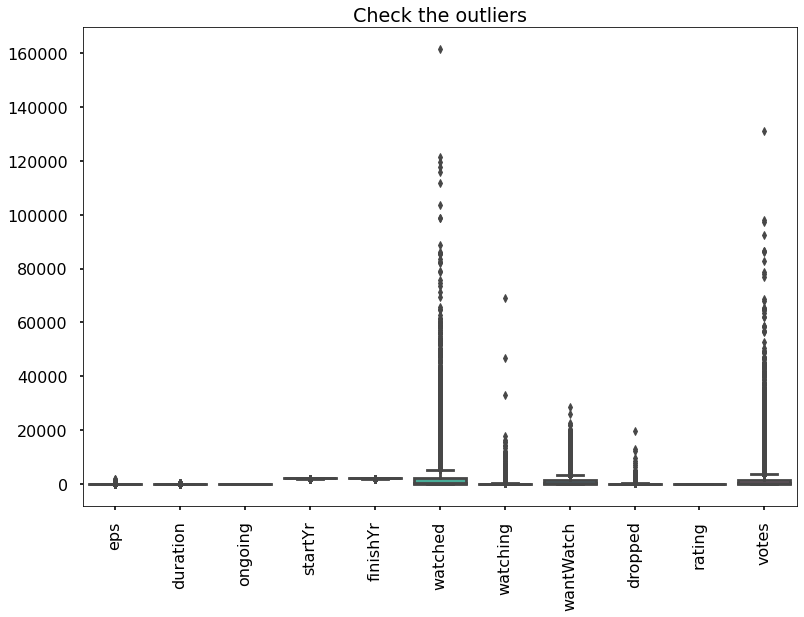

In [34]:
sns.boxplot(data=dfcorr)
plt.xticks(rotation=90)
plt.title('Check the outliers');

According to the dataset,we thought some animes have much more wathced people or fans than others which are normally phenomenon, so we decided to keep these outliers.

### Visualizations

In [35]:
all_genres = []
for item in df['tags']:
    item = item.strip()
    all_genres.extend(item.split(', '))

    # Count the number of items in the genre and create a dataframe
    c = Counter(all_genres)

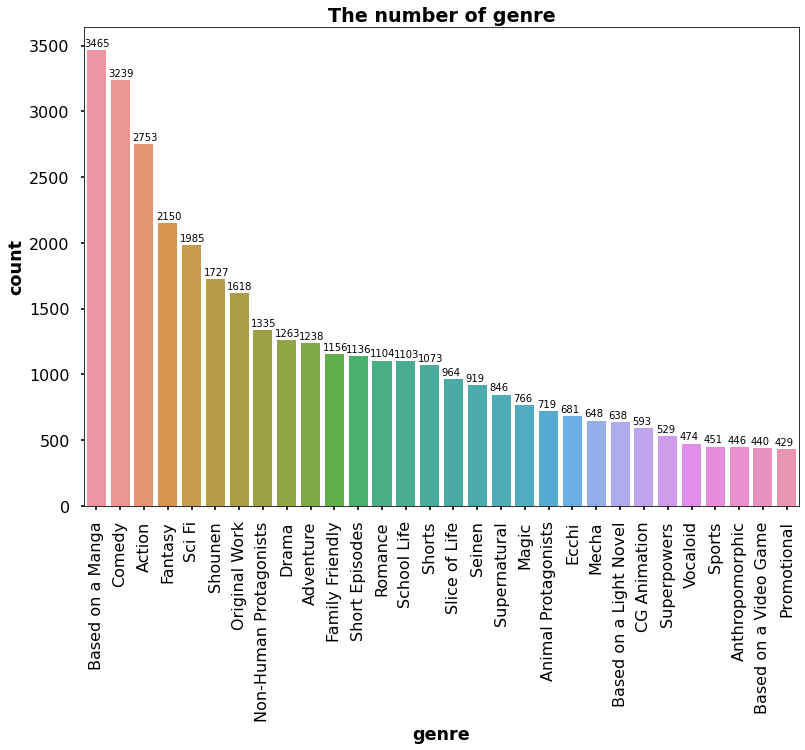

In [36]:
dp=pd.DataFrame(c.most_common(30))
dp.columns =['genre','count']
dp_plot=dp.sort_values(by=['count'], ascending=False).nlargest(30,'count')
a = 'genre'
b = 'count'

genre_countplot(a, b, dp_plot)

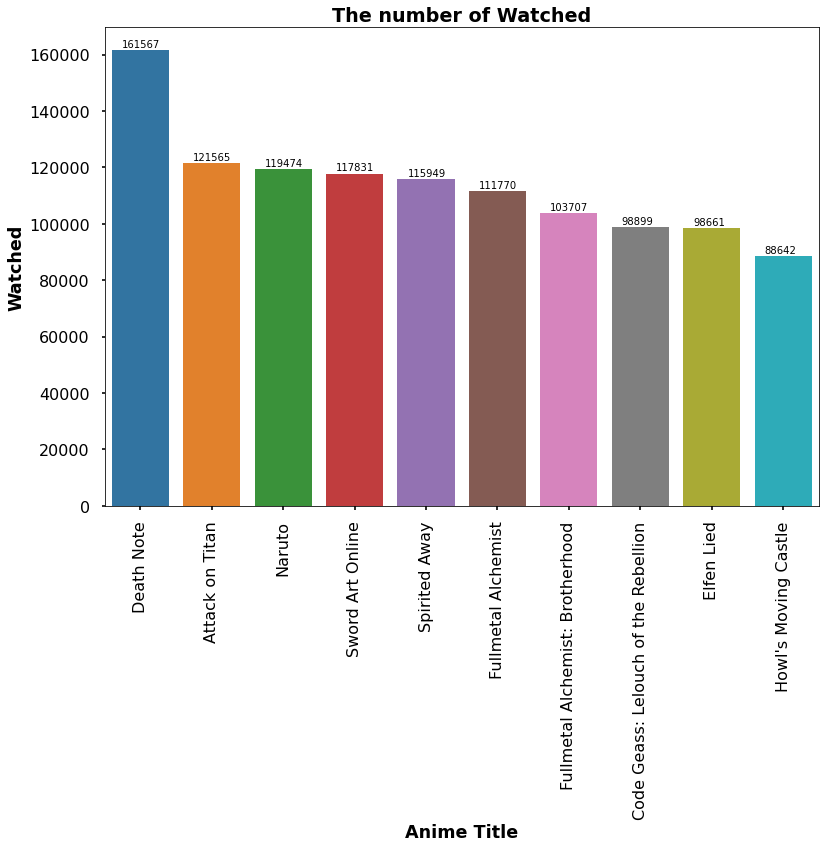

In [65]:
watched10=df.sort_values(by=['watched'], ascending=False).nlargest(10,'watched')
ax=sns.barplot(x='title',y='watched',data=watched10)
plt.xticks(rotation=90)
plt.ylabel("Watched", fontweight='bold')
plt.xlabel("Anime Title", fontweight='bold')
plt.title('The number of Watched', fontweight='bold')
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.14, p.get_height()+1000));

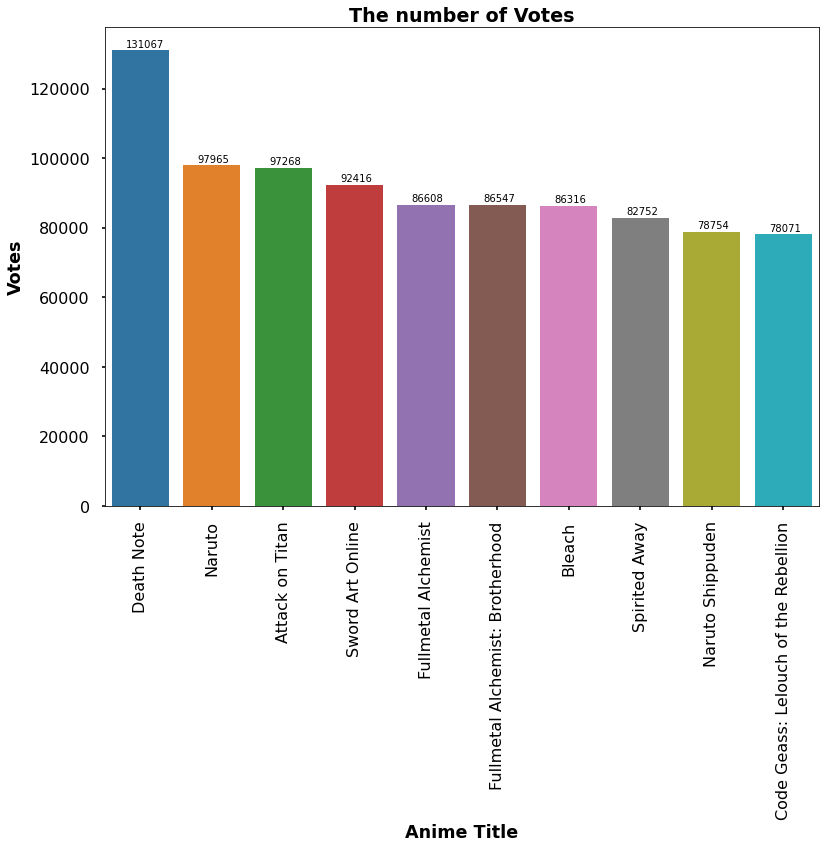

In [38]:
vote10=df.sort_values(by=['votes'], ascending=False).nlargest(10,'votes')
ax1=sns.barplot(x='title',y='votes',data=vote10)
plt.xticks(rotation=90)
plt.ylabel("Votes", fontweight='bold')
plt.xlabel("Anime Title", fontweight='bold')
plt.title('The number of Votes', fontweight='bold')
for p1 in ax1.patches:
        ax1.annotate('{:.0f}'.format(p1.get_height()), (p1.get_x()+0.2, p1.get_height()+1000));

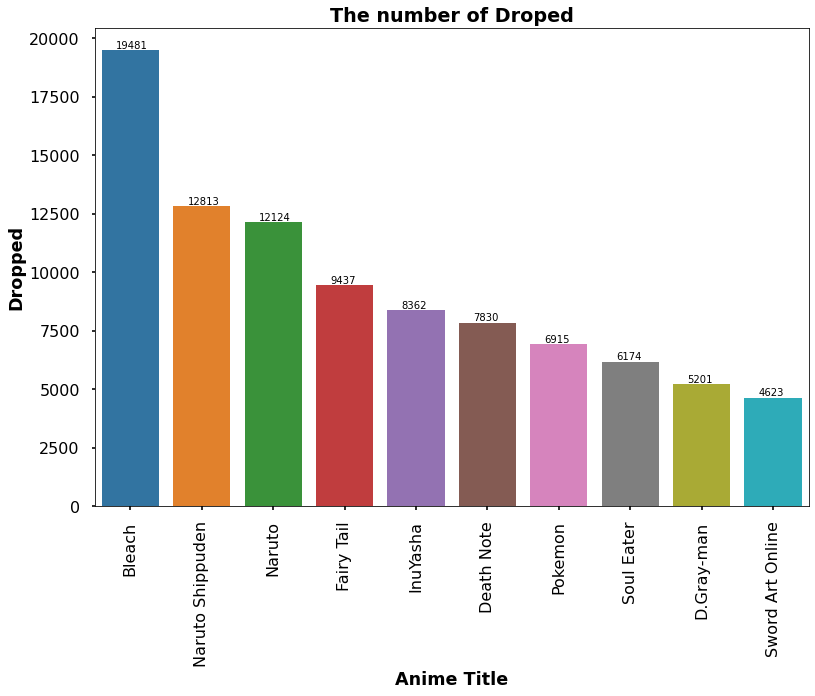

In [61]:
drop10=df.sort_values(by=['dropped'], ascending=False).nlargest(10,'dropped')
ax2=sns.barplot(x='title',y='dropped',data=drop10)
plt.xticks(rotation=90)
plt.ylabel("Dropped", fontweight='bold')
plt.xlabel("Anime Title", fontweight='bold')
plt.title('The number of Droped', fontweight='bold')
for p2 in ax2.patches:
        ax2.annotate('{:.0f}'.format(p2.get_height()), (p2.get_x()+0.2, p2.get_height()+100));

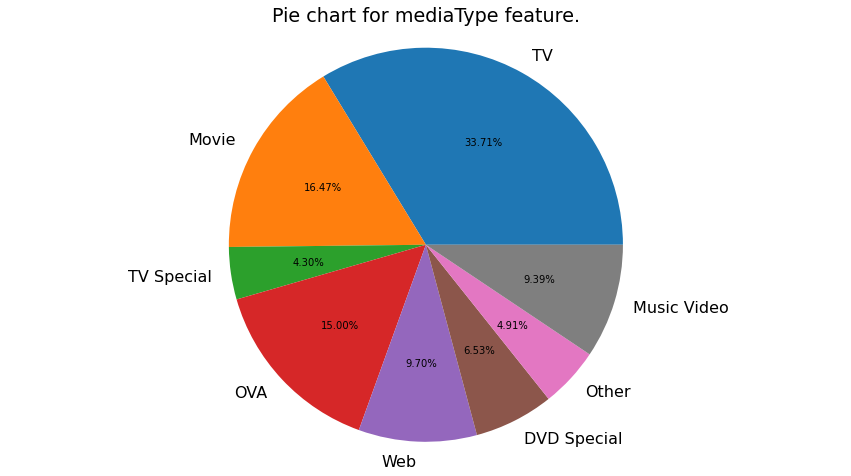

In [40]:
mt=Counter(df.mediaType)
pieplot(mt,'mediaType')

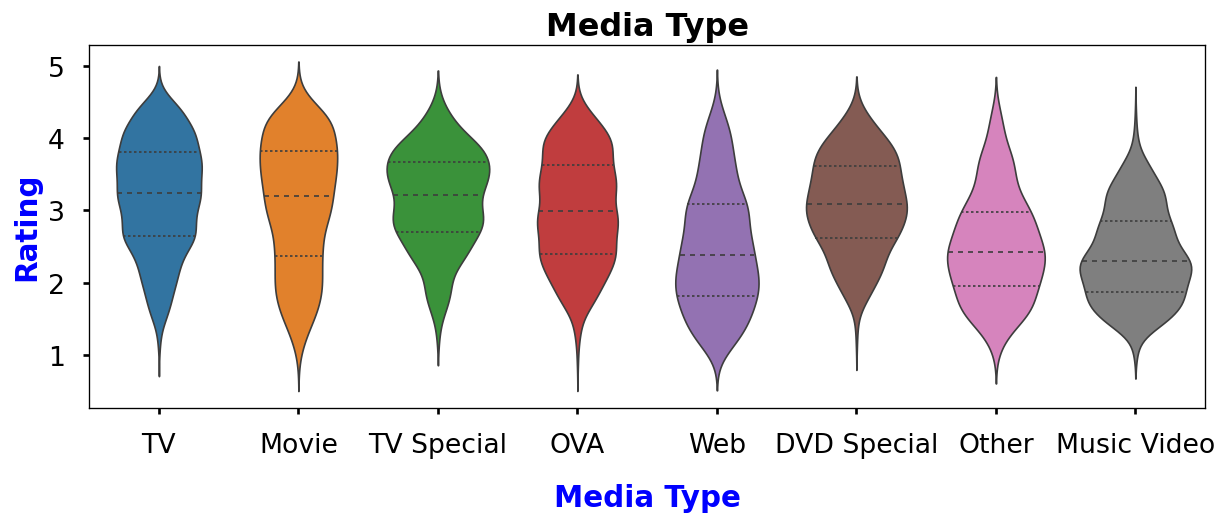

In [41]:
plt.figure(figsize=(12, 4), dpi=120)
scatter = sns.violinplot(data=df, x='mediaType', y='rating',split=True, inner="quart", linewidth=1)
plt.ylabel("Rating", color='blue', fontweight='bold')
plt.xlabel("Media Type", color='blue', fontweight='bold', labelpad=15)
plt.title('Media Type', fontweight='bold');

### Feature engineering

#### Split columns: tags and contentWarn

In [42]:
df.head()

,title,mediaType,eps,duration,ongoing,startYr,finishYr,tags,contentWarn,watched,watching,wantWatch,dropped,rating,votes
0,Fullmetal Alchemist: Brotherhood,TV,64.0,7.358053,False,2009.0,2010.0,"Action, Adventure, Drama, Fantasy, Mystery, Sh...","Animal Abuse, Mature Themes, Violence, Domesti...",103707.0,14351,25810,2656,4.702,86547.0
1,your name.,Movie,1.0,107.000000,False,2016.0,2016.0,"Drama, Romance, Body Swapping, Gender Bender, ...",Health,58831.0,1453,21733,124,4.663,43960.0
2,A Silent Voice,Movie,1.0,130.000000,False,2016.0,2016.0,"Drama, Shounen, Disability, Melancholy, Mental...","Bullying, Mature Themes, Suicide",45892.0,946,17148,132,4.661,33752.0
3,Haikyuu!! Karasuno High School vs Shiratorizaw...,TV,10.0,7.358053,False,2016.0,2016.0,"Shounen, Sports, Animeism, School Club, School...",Health,25134.0,2183,8082,167,4.660,17422.0
4,Attack on Titan 3rd Season: Part II,TV,10.0,7.358053,False,2019.0,2019.0,"Action, Fantasy, Horror, Shounen, Dark Fantasy...","Cannibalism, Explicit Violence",21308.0,3217,7864,174,4.650,15789.0


In [43]:
clean_tags(df,7)

According to different labels of tags and contentWarn, we decided to convert these columns to labels and each lables have bool values.

In [44]:
pd.set_option('display.max_columns',None)
df.head()

,title,mediaType,eps,duration,ongoing,startYr,finishYr,tags,contentWarn,watched,watching,wantWatch,dropped,rating,votes,Action,Adventure,Drama,Fantasy,Mystery,Shounen,Conspiracy,Military,Siblings,Based on a Manga,Romance,Body Swapping,Gender Bender,Opposites Attract,School Life,Supernatural,Original Work,Disability,Melancholy,Mental Illness,Sports,Animeism,School Club,Tournaments,Volleyball,Horror,Dark Fantasy,Isolated Society,Outside World,Post-apocalyptic,Comedy,Demons,Historical,Martial Arts,Orphans,Monsters,Superpowers,Sci Fi,Aliens,Feudal Japan,Samurai,Swordplay,Time Travel,Breaking the Fourth Wall,Crude,Gag,Parody,Slapstick,Psychic Powers,Psychological,LGBT Themes,Thriller,Based on a Visual Novel,Mecha,Mind Games,Overpowered Main Characters,Political,Real Robot,Rebellions,Rivalries,Royalty,Terrorism,noitaminA,Superheroes,Seinen,Slice of Life,Board Games,Episodic,Iyashikei,Weak to Strong,Shoujo,Bodyguards,Cats,Countryside,Japanese Mythology,Youkai,Cyborgs,Satire,Adult Couples,Coming of Age,Family Life,Illness,Curse,Family Friendly,Isekai,Magic,Person in a Strange World,England,Europe,Medieval,Revenge,War,Animal Characteristics,Animal Transformation,Childcare,Contemporary Fantasy,Lifestyle Change,Single Parent,Werewolves,Senpai-Kouhai Relationship,Based on a Light Novel,Androids,Non-Human Protagonists,Robots,Boxing,Hand to Hand Combat,Witches,Based on a Novel,Josei,Apprenticeship,Rakugo,Ecchi,Vampires,Italy,Environmental,Forest,Writers,Chinese Animation,Urban Fantasy,NEET,RPG,Assassins,Teaching,19th Century,Star-Crossed Lovers,Ancient China,Cultivation,Xianxia,Zombies,Proxy Battles,Bounty Hunters,Noir,Outer Space,Western,Age Transformation,Serial Killers,Modern Knowledge,Prehistoric,Survival,Loneliness,Delinquents,Work Life,Classical Music,Music,Unrequited Love,Space Opera,Basketball,Love Triangle,Anime Industry,Manga Industry,Otaku Culture,Voice Acting,Monster-of-the-week,Cheats,Reincarnation,Slimes,BL,Shounen-ai,Interspecies Relationship,Master-Servant Relationship,Guns,Anthropomorphic,Criminals,Detectives,Psychopaths,Shinigami,Vigilantes,Body Sharing,Baseball,Cooking,Culinary School,Food and Beverage,Human Experimentation,Summoned Into Another World,Based on an Eroge,Recap,Cyberpunk,Hacking,Religion,MMORPG,Boarding House,Neighbors,Art,Island,High Stakes Games,Ghosts,Gods,America,Combining Mecha,Super Robot,Butlers,PVP,Childhood Friends,15th Century,Deal with the Devil,Skeletons,Trapped in a Video Game,Virtual Reality,Economics,God-Human Relationship,Mature Romance,Pirates,Gangs,Mercenaries,Amnesia,Birds,Short Episodes,Magic School,Middle Eastern,Insects,Doctors,Germany,Medical,Reverse Harem,Crossdressing,Debt,Hosts,Social Gap,Love Confession,Student Council,Autobiographies,Poverty,World War 2,Romantic Comedy,Tsundere,Mafia,Trains,All-Boys School,Agriculture,Dystopia,Police,Ping Pong,College,Music School,Circus,Nobility,Social Media,Prison,Leijiverse,Apartment Life,Racing,Running,Age Gap,Library,Cafe,Guilds,Elemental Powers,Based on a Video Game,Prophecy,Animal Protagonists,CG Animation,Ice Skating,Magical Girl,Henshin Heroes,Transfer Students,Amusement Park,Mysterious Shop,Maids,Newly Co-ed School,Acting,Idols,Showbiz,Astronauts,Childhood Promise,Kickboxing,Married Life,Afterlife,Christmas,Shorts,Bar,Play or Die,Thieves,Dinosaurs,Desert,France,Cars,Military School,Ocean,Sherlock Holmes,Reverse Isekai,Yakuza,Tennis,Aging,No Dialogue,Boss-Employee Relationship,Coworkers,Editors,Yaoi Hand Syndrome,Rock Music,Dark Comedy,Hell,Androphobia,Restaurants,Based on a 4-Koma Manga,Fashion,Firefighters,Cycling,Cohabitation,Motorcycles,Fujoshi,Salaryman,Video Game Industry,Dragons,Monster Girls,Roommates,Gambling,Dancing,Harem,Scuba Diving,Pregnancy,The Great Outdoors,Sanrio Characters,Wuxia,Boarding School,Abstract,Dungeon,Art School,18th Century,Greek Mythology,Power Suits,Secret Identity,Earthquake,Natural Disaster,Blackmail,Aviation,Biographies,Swimming,All-Girls School,Fated Lovers,Pets,Korean Animation,World Masterpiece Theater

In [45]:
drop_list = []
for i in range(15,509):
    if df.iloc[:,i].sum() < 500:
        drop_list.append(df.iloc[:,i].name)
df.drop(columns=drop_list,inplace = True)

In [46]:
clean_tags(df,8)

Convert all boolean values to int, like ture for 1, false for 0.

In [47]:
df.loc[:, df.dtypes.eq('bool')] = df.loc[:, df.dtypes.eq('bool')].astype(int)

In [48]:
df=df.drop(['tags','contentWarn'],axis=1)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11610 entries, 0 to 13373
Data columns (total 57 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   title                   11610 non-null  object 
 1   mediaType               11610 non-null  object 
 2   eps                     11610 non-null  float64
 3   duration                11610 non-null  float64
 4   ongoing                 11610 non-null  int64  
 5   startYr                 11610 non-null  float64
 6   finishYr                11610 non-null  float64
 7   watched                 11610 non-null  float64
 8   watching                11610 non-null  int64  
 9   wantWatch               11610 non-null  int64  
 10  dropped                 11610 non-null  int64  
 11  rating                  11610 non-null  float64
 12  votes                   11610 non-null  float64
 13  Action                  11610 non-null  int64  
 14  Adventure               11610 non-null

In [50]:
df.head()

,title,mediaType,eps,duration,ongoing,startYr,finishYr,watched,watching,wantWatch,dropped,rating,votes,Action,Adventure,Drama,Fantasy,Shounen,Based on a Manga,Romance,School Life,Supernatural,Original Work,Comedy,Superpowers,Sci Fi,Mecha,Seinen,Slice of Life,Family Friendly,Magic,Based on a Light Novel,Non-Human Protagonists,Ecchi,Short Episodes,Animal Protagonists,CG Animation,Shorts,Animal Abuse,Mature Themes,Violence,Domestic Abuse,Health,Bullying,Suicide,Cannibalism,Explicit Violence,Self-Harm,Emotional Abuse,Physical Abuse,Nudity,Drug Use,Sexual Abuse,Sexual Content,Explicit Sex,Prostitution,Incest
0,Fullmetal Alchemist: Brotherhood,TV,64.0,7.358053,0,2009.0,2010.0,103707.0,14351,25810,2656,4.702,86547.0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,your name.,Movie,1.0,107.000000,0,2016.0,2016.0,58831.0,1453,21733,124,4.663,43960.0,0,0,1,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,A Silent Voice,Movie,1.0,130.000000,0,2016.0,2016.0,45892.0,946,17148,132,4.661,33752.0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
3,Haikyuu!! Karasuno High School vs Shiratorizaw...,TV,10.0,7.358053,0,2016.0,2016.0,25134.0,2183,8082,167,4.660,17422.0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Attack on Titan 3rd Season: Part II,TV,10.0,7.358053,0,2019.0,2019.0,21308.0,3217,7864,174,4.650,15789.0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:xlabel='rating', ylabel='Count'>

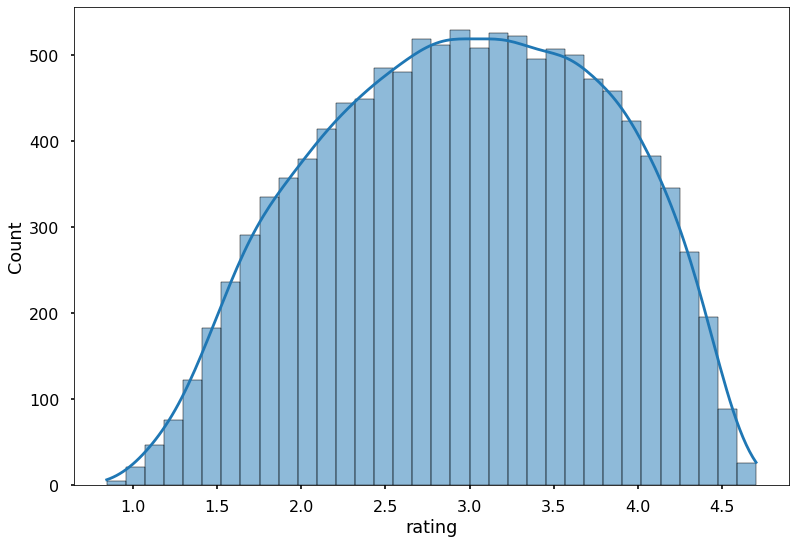

In [51]:
sns.histplot(x = 'rating',data = df,kde=True)

In [52]:
df.shape

(11610, 57)

In [53]:
df.describe()

,eps,duration,ongoing,startYr,finishYr,watched,watching,wantWatch,dropped,rating,votes,Action,Adventure,Drama,Fantasy,Shounen,Based on a Manga,Romance,School Life,Supernatural,Original Work,Comedy,Superpowers,Sci Fi,Mecha,Seinen,Slice of Life,Family Friendly,Magic,Based on a Light Novel,Non-Human Protagonists,Ecchi,Short Episodes,Animal Protagonists,CG Animation,Shorts,Animal Abuse,Mature Themes,Violence,Domestic Abuse,Health,Bullying,Suicide,Cannibalism,Explicit Violence,Self-Harm,Emotional Abuse,Physical Abuse,Nudity,Drug Use,Sexual Abuse,Sexual Content,Explicit Sex,Prostitution,Incest
count,11610.000000,11610.000000,11610.0,11610.000000,11610.000000,11610.000000,11610.000000,11610.000000,11610.000000,11610.000000,11610.000000,11610.000000,11610.000000,11610.000000,11610.000000,11610.000000,11610.000000,11610.000000,11610.000000,11610.000000,11610.000000,11610.000000,11610.000000,11610.000000,11610.000000,11610.000000,11610.000000,11610.000000,11610.000000,11610.000000,11610.000000,11610.000000,11610.000000,11610.000000,11610.000000,11610.000000,11610.000000,11610.000000,11610.000000,11610.000000,11610.000000,11610.000000,11610.000000,11610.000000,11610.000000,11610.000000,11610.000000,11610.000000,11610.000000,11610.000000,11610.000000,11610.000000,11610.000000,11610.000000,11610.000000
mean,12.458053,22.399085,0.0,2005.502929,2005.760810,2959.137898,245.473127,1235.170801,154.488114,2.959543,2152.968734,0.237123,0.106632,0.116365,0.185702,0.155728,0.298450,0.097502,0.095004,0.072868,0.139363,0.279931,0.045564,0.170973,0.055900,0.079156,0.083032,0.099569,0.068648,0.054953,0.114987,0.058656,0.097847,0.061929,0.051077,0.092420,0.005254,0.033075,0.066494,0.002153,0.881481,0.004220,0.004910,0.001981,0.022308,0.000517,0.004393,0.016624,0.033419,0.002929,0.007235,0.014126,0.011542,0.000431,0.001809
std,41.182305,28.047266,0.0,14.400467,14.322873,7862.277107,1153.635210,2318.342022,485.843505,0.827171,6030.733973,0.425337,0.308658,0.320676,0.388883,0.362613,0.457598,0.296653,0.293234,0.259931,0.346339,0.448984,0.208547,0.376502,0.229739,0.269994,0.275942,0.299438,0.252865,0.227898,0.319020,0.234990,0.297120,0.241038,0.220164,0.289631,0.072298,0.178840,0.249155,0.046356,0.323235,0.064831,0.069899,0.044467,0.147691,0.022728,0.066135,0.127862,0.179737,0.054039,0.084755,0.118014,0.106815,0.020749,0.042493
min,1.000000,1.000000,0.0,1907.000000,1907.000000,0.000000,0.000000,0.000000,0.000000,0.844000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,5.000000,0.0,2001.000000,2001.000000,58.000000,2.000000,53.000000,3.000000,2.318000,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,7.358053,0.0,2010.000000,2011.000000,370.000000,15.000000,322.000000,12.000000,2.981000,242.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,12.000000,30.000000,0.0,2015.000000,2015.000000,2167.000000,104.000000,1330.250000,69.000000,3.625750,1494.000000,0.000000,0.000000,0.000000,0.00

### Check the multicollinearity

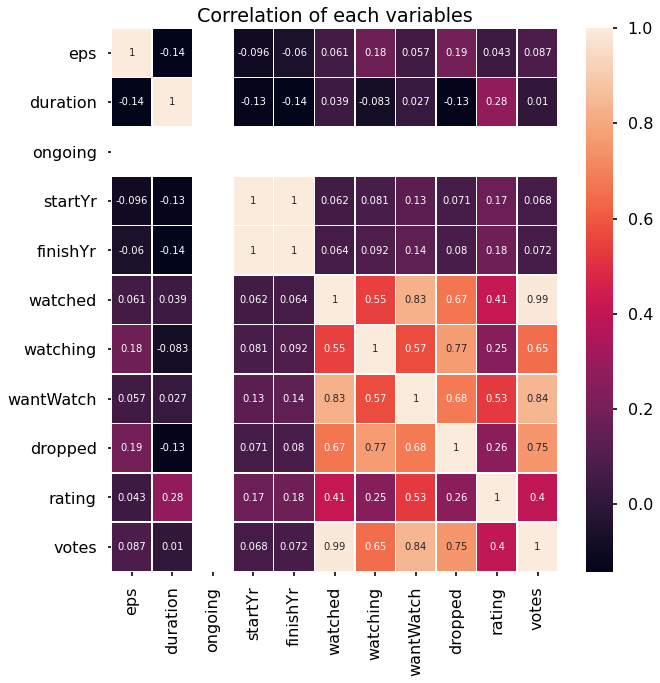

In [54]:
corr = dfcorr.corr()
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(corr, annot=True, linewidths=0.5,ax=ax)
plt.title('Correlation of each variables');

In [55]:
df_model=df.drop(['finishYr','votes','ongoing'],axis=1)

Due to the high correlation of the correlation heatmap, so we first decided to delete finishYr and votes columns to reduce multicollinearity for avoiding the machine learning bais. In additon, we deleted ongoing columns because this varaible just have one value, ture, it hasn't valuable meaningful for furthur analysis.

In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [57]:
dfvif=dfcorr.drop(['finishYr','votes','rating','ongoing'],axis=1)
vif = pd.DataFrame()
vif['VIF Factor']=[variance_inflation_factor(dfvif.values,i) for i in range(len(dfvif.columns))]
vif['features']=dfvif.columns
vif=vif.sort_values('VIF Factor', ascending=False)
print(vif)

   VIF Factor   features
5    4.569764  wantWatch
3    3.937866    watched
6    3.780061    dropped
4    2.606312   watching
2    2.094088    startYr
1    1.743605   duration
0    1.163331        eps


After deleting these variables, we double check the VIF to confirm none of variable vif greater than 10.

### Feature processing

In [58]:
df_model.startYr.unique()

array([2009., 2016., 2019., 2015., 2011., 2013., 2008., 2020., 2018.,
       2017., 2014., 2012., 2001., 2000., 2004., 2006., 1997., 1999.,
       2010., 1998., 1988., 2005., 2007., 2003., 1984., 2002., 1995.,
       1986., 1996., 1989., 1993., 1992., 1980., 1979., 1994., 1982.,
       1978., 1983., 1985., 1977., 1991., 1970., 1981., 1990., 1987.,
       1971., 1969., 1973., 1974., 1975., 1976., 1968., 1972., 1964.,
       1966., 1962., 1963., 1967., 1956., 1965., 1958., 1961., 1959.,
       1933., 1960., 1947., 1929., 1957., 1928., 1925., 1937., 1931.,
       1943., 1932., 1941., 1948., 1930., 1917., 1954., 1952., 1945.,
       1940., 1939., 1935., 1946., 1950., 1924., 1926., 1907., 1936.,
       1953., 1934., 1927., 1942., 1944., 1938., 1949., 1918.])

In [59]:
bins = [0, 1909, 1919, 1929, 1939, 1949, 1959,1969,1979,1989,1999,2009,2019,2021]
labels = [1,2,3,4,5,6,7,8,9,10,11,12,13]
df_model['srartyrbin'] = pd.cut(df_model['startYr'], bins=bins, labels=labels)

In [60]:
df_model.rating.max()

4.702

In [61]:
bins1 = [0, 1.499, 2.499, 3.499, 4.499, 5]
labels1 = [1,2,3,4,5]
df_model['ratingbin'] = pd.cut(df_model['rating'], bins=bins1, labels=labels1)

After checking the rating and startyr variables, in order to use startyr and rating for classification modeling, we decided to set bins of these columns and get integer values.

In [62]:
df_model.head()

,title,mediaType,eps,duration,startYr,watched,watching,wantWatch,dropped,rating,Action,Adventure,Drama,Fantasy,Shounen,Based on a Manga,Romance,School Life,Supernatural,Original Work,Comedy,Superpowers,Sci Fi,Mecha,Seinen,Slice of Life,Family Friendly,Magic,Based on a Light Novel,Non-Human Protagonists,Ecchi,Short Episodes,Animal Protagonists,CG Animation,Shorts,Animal Abuse,Mature Themes,Violence,Domestic Abuse,Health,Bullying,Suicide,Cannibalism,Explicit Violence,Self-Harm,Emotional Abuse,Physical Abuse,Nudity,Drug Use,Sexual Abuse,Sexual Content,Explicit Sex,Prostitution,Incest,srartyrbin,ratingbin
0,Fullmetal Alchemist: Brotherhood,TV,64.0,7.358053,2009.0,103707.0,14351,25810,2656,4.702,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,5
1,your name.,Movie,1.0,107.000000,2016.0,58831.0,1453,21733,124,4.663,0,0,1,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,5
2,A Silent Voice,Movie,1.0,130.000000,2016.0,45892.0,946,17148,132,4.661,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,12,5
3,Haikyuu!! Karasuno High School vs Shiratorizaw...,TV,10.0,7.358053,2016.0,25134.0,2183,8082,167,4.660,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,5
4,Attack on Titan 3rd Season: Part II,TV,10.0,7.358053,2019.0,21308.0,3217,7864,174,4.650,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,12,5


In [63]:
df_fmodel=df_model.drop(['startYr','rating'],axis=1)

In [64]:
df_fmodel.mediaType.unique()

array(['TV', 'Movie', 'TV Special', 'OVA', 'Web', 'DVD Special', 'Other',
       'Music Video'], dtype=object)

In [65]:
df_final=pd.get_dummies(data=df_fmodel,columns=['mediaType'])

In [66]:
df_final['srartyrbin']=df_final['srartyrbin'].astype(int)

In [67]:
df_final['ratingbin']=df_final['ratingbin'].astype(int)

In [68]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11610 entries, 0 to 13373
Data columns (total 61 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   title                   11610 non-null  object 
 1   eps                     11610 non-null  float64
 2   duration                11610 non-null  float64
 3   watched                 11610 non-null  float64
 4   watching                11610 non-null  int64  
 5   wantWatch               11610 non-null  int64  
 6   dropped                 11610 non-null  int64  
 7   Action                  11610 non-null  int64  
 8   Adventure               11610 non-null  int64  
 9   Drama                   11610 non-null  int64  
 10  Fantasy                 11610 non-null  int64  
 11  Shounen                 11610 non-null  int64  
 12  Based on a Manga        11610 non-null  int64  
 13  Romance                 11610 non-null  int64  
 14  School Life             11610 non-null

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [70]:
X=df_final.drop(['ratingbin','title'],axis=1)
y=df_final['ratingbin']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#### Check the distribution of each classification of target variable

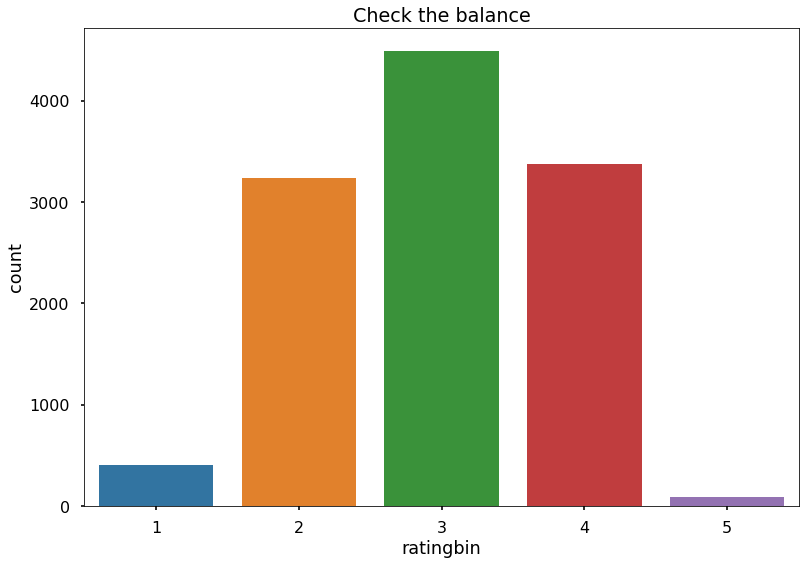

In [71]:
sns.countplot(x='ratingbin',data=df_final)
plt.title('Check the balance');

Based on the this results, we found the target is not balance,so we decided to balance the trainning data to get better performance of classification of modeling by using oversampling. Due to the select data is not big enough to do undersampling that may be loss enough information for machine learning.

#### Oversampling train dataset

In [72]:
from collections import Counter
from imblearn.combine import SMOTETomek

In [73]:
# Balance data using oversampling method
counter = Counter(y_train)
print('Before',counter)
# oversampling the dataset
st = SMOTETomek(random_state = 42)
X_train_st,y_train_st = st.fit_resample(X_train,y_train)
countera = Counter(y_train_st)
print('After',countera)

Before Counter({3: 3594, 4: 2699, 2: 2616, 1: 311, 5: 68})
After Counter({5: 3575, 1: 3547, 4: 3205, 2: 3178, 3: 2929})


SMOTE + TOMEK is a hybrid technology that can eliminate overlapping data for each category distributed in the sample space. If only SMOTE is used for oversampling, each category will overlap with each other, so the classifier model may overfit. Therefore, our group decided to apply the Tomek link to the over-sampling minority samples conducted by SMOTE. Tomek Links refers to a method for identifying pairs of nearest neighbors in a dataset that have different classes. Removing one or both of the examples in these pairs (such as the examples in the majority class) has the effect of making the decision boundary in the training dataset less noisy or ambiguous.

### Data rescaler

In [74]:
scaler=MinMaxScaler().fit(X_train_st)
X_st_train=scaler.transform(X_train_st)
X_st_test=scaler.transform(X_test)

MinMaxScaler rescales the data set such that all feature values are in the range [0,1]. We have many dummy values, so we need to rescaler data to avoid the bias or deviation results after modeling.

### Classification Model

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, roc_curve, auc,classification_report,roc_auc_score
from sklearn.model_selection import cross_val_score, GridSearchCV,RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

#### Logistic Regerssion Model

In [76]:
Log_base=LogisticRegression(random_state=42)
Log_base.fit(X_st_train,y_train_st)
y_pred=Log_base.predict(X_st_test)
accuracy_train = round(Log_base.score(X_st_train, y_train_st) * 100, 2)
print('The accuracy of train is {}.'.format(accuracy_train))
accuracy_test = round(metrics.accuracy_score(y_test,y_pred) * 100, 2)
print('The accuracy of test is {}.'.format(accuracy_test))

The accuracy of train is 68.98.
The accuracy of test is 55.68.


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [77]:
# define models and parameters
log_model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2','l1']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
grid_search = GridSearchCV(estimator=log_model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_st_train, y_train_st)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.715042 using {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.715042 (0.008806) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.697781 (0.009145) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.693076 (0.009660) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'lbfgs'}
0.702426 (0.009554) with: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
0.700763 (0.008587) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.695225 (0.008840) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.679222 (0.010164) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 10, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 10, 'penalty': 'l1', 'solver': 'lbfgs'}
0.698512 (0.009615) with: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
0.681818 (0.008146) with: 

The Logistic Regression accuracy of train is 72.04.
              precision    recall  f1-score   support

           1       0.25      0.44      0.32        97
           2       0.52      0.57      0.54       621
           3       0.59      0.55      0.57       901
           4       0.75      0.67      0.71       677
           5       0.39      0.42      0.41        26

    accuracy                           0.58      2322
   macro avg       0.50      0.53      0.51      2322
weighted avg       0.60      0.58      0.59      2322



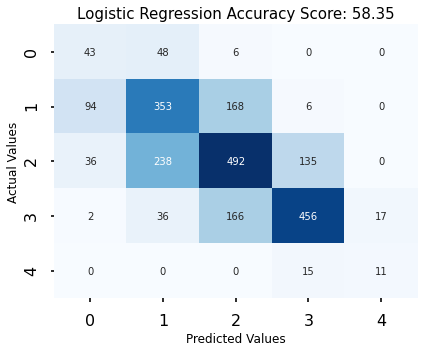

In [78]:
Log=LogisticRegression(penalty='l2',solver='newton-cg',C=100,random_state=42)
Log.fit(X_st_train,y_train_st)
ylog_pred=Log.predict(X_st_test)
Accuracy_train = round(Log.score(X_st_train, y_train_st) * 100, 2)
print('The Logistic Regression accuracy of train is {}.'.format(Accuracy_train))
Accuracy_test = round(metrics.accuracy_score(y_test,ylog_pred) * 100, 2)
#print('The accuracy of test is {}.'.format(Accuracy_test))
confusion_matrix(y_test,ylog_pred)
print(classification_report(y_test,ylog_pred))
plt.subplots(figsize=(6,5))
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,ylog_pred)), annot = True, cbar=False,cmap='Blues',fmt='g')
plt.ylabel('Actual Values',fontsize=12)
plt.xlabel('Predicted Values',fontsize=12)
plt.title('Logistic Regression Accuracy Score: {0}'.format(Accuracy_test, size = 20),fontsize=15)
plt.tight_layout()
plt.show()

Feature:0, Score: -43.00369
Feature:1, Score: -4.98926
Feature:2, Score: -24.43605
Feature:3, Score: -6.82294
Feature:4, Score: -67.33757
Feature:5, Score: 47.32412
Feature:6, Score: 0.01150
Feature:7, Score: -1.38197
Feature:8, Score: -2.66284
Feature:9, Score: -0.96341
Feature:10, Score: -2.14404
Feature:11, Score: -2.24732
Feature:12, Score: -0.86914
Feature:13, Score: -0.30338
Feature:14, Score: -2.68622
Feature:15, Score: -0.27385
Feature:16, Score: 0.40831
Feature:17, Score: -1.45617
Feature:18, Score: -0.70623
Feature:19, Score: -1.59226
Feature:20, Score: 0.78823
Feature:21, Score: -1.76757
Feature:22, Score: 0.43185
Feature:23, Score: -1.20145
Feature:24, Score: -1.65778
Feature:25, Score: 0.68232
Feature:26, Score: -0.64657
Feature:27, Score: 1.41653
Feature:28, Score: -0.66848
Feature:29, Score: 0.36497
Feature:30, Score: 1.32124
Feature:31, Score: -3.34997
Feature:32, Score: -1.21717
Feature:33, Score: -0.63244
Feature:34, Score: -0.11750
Feature:35, Score: -1.39657
Feature

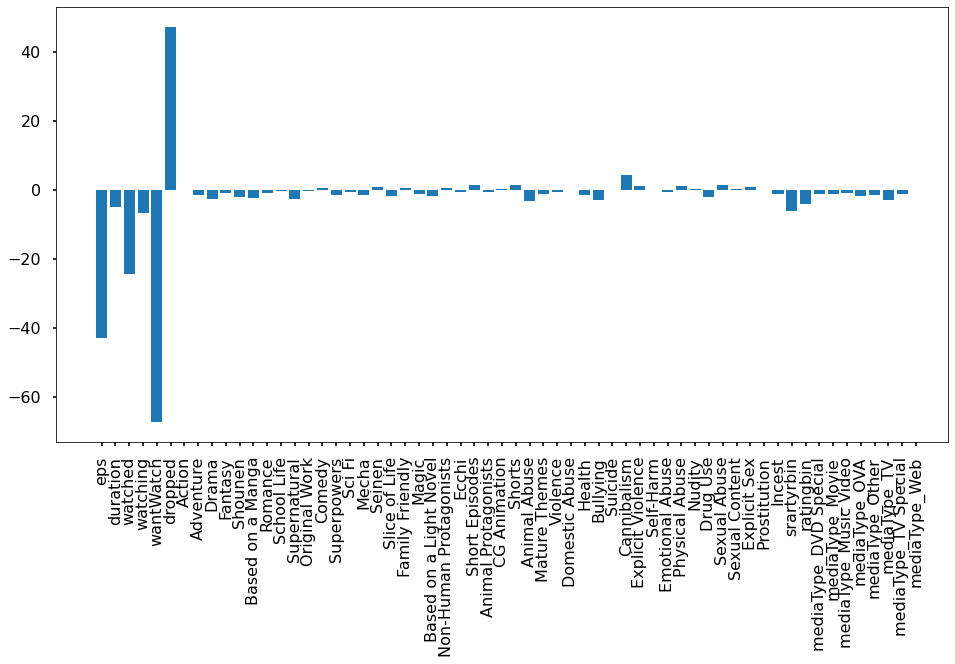

In [79]:
# get feature importance
importance = Log.coef_[0]
for i,v in enumerate(importance):
    print('Feature:%0d, Score: %.5f' % (i,v))
plt.subplots(figsize=(16,8))
plt.bar([x for x in range(len(importance))], importance)
plt.xticks([0, 1, 2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59],\
           ['eps','duration','watched','watching','wantWatch','dropped','Action','Adventure','Drama','Fantasy',\
            'Shounen','Based on a Manga','Romance','School Life','Supernatural','Original Work','Comedy',\
            'Superpowers','Sci Fi','Mecha','Seinen','Slice of Life','Family Friendly','Magic',\
            'Based on a Light Novel','Non-Human Protagonists','Ecchi',' Short Episodes','Animal Protagonists',\
           'CG Animation','Shorts','Animal Abuse','Mature Themes','Violence','Domestic Abuse','Health',\
            'Bullying','Suicide','Cannibalism','Explicit Violence','Self-Harm','Emotional Abuse','Physical Abuse',\
           'Nudity','Drug Use','Sexual Abuse','Sexual Content','Explicit Sex','Prostitution','Incest',\
            'srartyrbin','ratingbin','mediaType_DVD Special','mediaType_Movie','mediaType_Music Video',\
            'mediaType_OVA','mediaType_Other','mediaType_TV','mediaType_TV Special','mediaType_Web'],rotation=90)
plt.show()

#### Decistion Tree

In [80]:
acc = [] # list to store all performance metric

In [81]:
best_score_DT = 0
kfolds=5
for md in range(1, 9): # iterate different maximum depth values
    # train the model
    treeModel = DecisionTreeClassifier(random_state=0, max_depth=md, criterion='gini')
    # perform cross-validation
    scores = cross_val_score(treeModel, X_st_train, y_train_st, cv=kfolds, scoring='accuracy')
    
    # compute mean cross-validation accuracy
    score = np.mean(scores)
    
    # if we got a better score, store the score and parameters
    if score > best_score_DT:
        best_score_DF = score
        best_parameter = md

# Rebuild a model on the combined training and validation set        
SelectedDTModel = DecisionTreeClassifier(max_depth=best_parameter).fit(X_st_train, y_train_st)

test_score = SelectedDTModel.score(X_st_test, y_test)
PredictedOutput = SelectedDTModel.predict(X_st_test)
fpr, tpr, thresholds = roc_curve(y_test, PredictedOutput, pos_label=1)
test_auc = auc(fpr, tpr)
print("Best accuracy on validation set is:", best_score_DT)
print("Best parameter for the maximum depth is: ", best_parameter)
print("Test accuracy with best parameter is ", test_score)
print("Test AUC with the best parameter is ", test_auc)

m = 'Decision Tree'
acc.append([m, test_score, test_auc, fpr, tpr, thresholds])

Best accuracy on validation set is: 0
Best parameter for the maximum depth is:  8
Test accuracy with best parameter is  0.5615848406546081
Test AUC with the best parameter is  0.11990269894590525


In [82]:
print("Feature importance: ")
np.array([X.columns.values.tolist(), list(SelectedDTModel.feature_importances_)]).T

Feature importance: 


array([['eps', '0.0286410036165478'],
       ['duration', '0.061975958998115845'],
       ['watched', '0.05082981413934729'],
       ['watching', '0.03446892120527991'],
       ['wantWatch', '0.5881091752995031'],
       ['dropped', '0.10399274285737047'],
       ['Action', '0.0017363449723966046'],
       ['Adventure', '0.0004507163950109948'],
       ['Drama', '0.003416202765202869'],
       ['Fantasy', '0.005264523130503922'],
       ['Shounen', '0.0'],
       ['Based on a Manga', '0.006532787258786083'],
       ['Romance', '0.028558369808988345'],
       ['School Life', '0.0'],
       ['Supernatural', '0.0012212159371776806'],
       ['Original Work', '0.0003153574600169433'],
       ['Comedy', '0.0006106591454453712'],
       ['Superpowers', '0.0'],
       ['Sci Fi', '0.0013955160313061812'],
       ['Mecha', '0.0'],
       ['Seinen', '0.00020536148897402836'],
       ['Slice of Life', '0.0'],
       ['Family Friendly', '0.0'],
       ['Magic', '0.0'],
       ['Based on a Light No

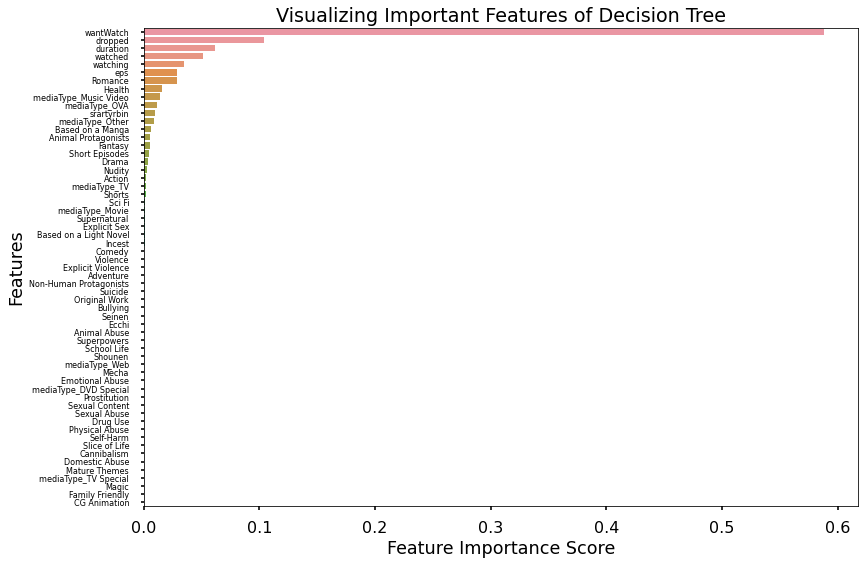

In [83]:
feature_imp_DT = pd.Series(SelectedDTModel.feature_importances_, index = X.columns).sort_values(ascending=False)
sns.barplot(x=feature_imp_DT,y=feature_imp_DT.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.yticks(fontsize=8)
plt.title("Visualizing Important Features of Decision Tree")
plt.show()

74.9
56.16
              precision    recall  f1-score   support

           1       0.25      0.60      0.36        97
           2       0.50      0.47      0.48       621
           3       0.59      0.56      0.57       901
           4       0.73      0.64      0.68       677
           5       0.31      0.62      0.42        26

    accuracy                           0.56      2322
   macro avg       0.48      0.58      0.50      2322
weighted avg       0.59      0.56      0.57      2322



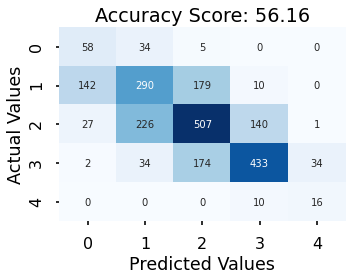

In [84]:
accuracy_DT = round(SelectedDTModel.score(X_st_train,y_train_st) * 100, 2)
print(accuracy_DT)
DTy_pred = SelectedDTModel.predict(X_st_test)
accuracy_test_DT = round(metrics.accuracy_score(y_test,DTy_pred) * 100, 2)
print(accuracy_test_DT)
confusion_matrix(y_test,DTy_pred)
print(classification_report(y_test,DTy_pred))
plt.subplots(figsize=(5,4))
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,DTy_pred)), annot = True, cbar=False,cmap='Blues',fmt='g')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.title('Accuracy Score: {0}'.format(accuracy_test_DT, size = 15))
plt.tight_layout()
plt.show()

#### Random Forest

In [85]:
best_score_RF = 0

for M in range(400, 1000, 50): # combines M trees
    for d in range(9, 15): # maximum number of features considered at each split
        for m in range(1, 9): # maximum depth of the tree
            # train the model
            # n_jobs(4) is the number of parallel computing
            forestModel = RandomForestClassifier(n_estimators=M, max_features=d, n_jobs=-1,
                                          max_depth=m, random_state=0)
        
            # perform cross-validation
            scores = cross_val_score(forestModel, X_st_train, y_train_st, cv=kfolds, scoring='accuracy')

            # compute mean cross-validation accuracy
            score = np.mean(scores)

            # if we got a better score, store the score and parameters
            if score > best_score_RF:
                best_score_RF = score
                best_M = M
                best_d = d
                best_m = m

# Rebuild a model on the combined training and validation set        
SelectedRFModel = RandomForestClassifier(n_estimators=M, max_features=d,max_depth=m, random_state=0).fit(X_st_train, y_train_st)

PredictedOutput = SelectedRFModel.predict(X_st_test)
test_score = SelectedRFModel.score(X_st_test, y_test)
fpr, tpr, thresholds = roc_curve(y_test, PredictedOutput, pos_label=1)
test_auc = auc(fpr, tpr)
print("Best accuracy on validation set is:", best_score_RF)
print("Best parameters of M, d, m are: ", best_M, best_d, best_m)
print("Test accuracy with the best parameters is", test_score)
print("Test AUC with the best parameters is:", test_auc)

m = 'Random Forest'
acc.append([m, test_score, test_auc, fpr, tpr, thresholds])

Best accuracy on validation set is: 0.7404754264433878
Best parameters of M, d, m are:  950 14 8
Test accuracy with the best parameters is 0.582687338501292
Test AUC with the best parameters is: 0.10588208038920424


In [86]:
print("Feature importance: ")
np.array([X.columns.values.tolist(), list(SelectedRFModel.feature_importances_)]).T

Feature importance: 


array([['eps', '0.031121460978510568'],
       ['duration', '0.09498289417552744'],
       ['watched', '0.14569600246674438'],
       ['watching', '0.15425474871735645'],
       ['wantWatch', '0.2722431047707084'],
       ['dropped', '0.09217472930464295'],
       ['Action', '0.0046852397695867'],
       ['Adventure', '0.0028416553871999754'],
       ['Drama', '0.007602801595981064'],
       ['Fantasy', '0.010299687479978052'],
       ['Shounen', '0.0055345125260992546'],
       ['Based on a Manga', '0.013800288940691312'],
       ['Romance', '0.010948738702484414'],
       ['School Life', '0.003806712248088976'],
       ['Supernatural', '0.0017676007845150996'],
       ['Original Work', '0.003715797793980304'],
       ['Comedy', '0.010909925292890053'],
       ['Superpowers', '0.0008989488442536393'],
       ['Sci Fi', '0.0046595429380734375'],
       ['Mecha', '0.0004765070271815697'],
       ['Seinen', '0.0014751001305872624'],
       ['Slice of Life', '0.001968493670470061'],
     

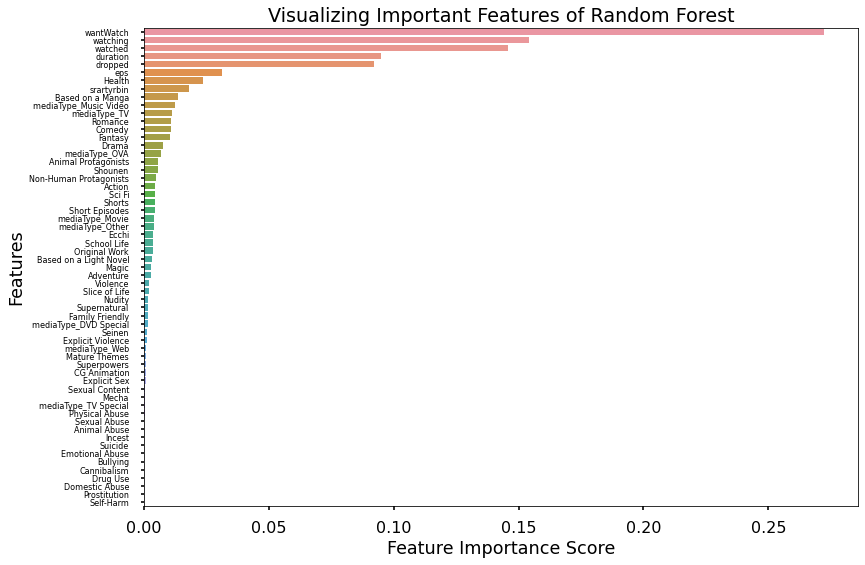

In [87]:
feature_imp_rf = pd.Series(SelectedRFModel.feature_importances_, index = X.columns).sort_values(ascending=False)
sns.barplot(x=feature_imp_rf,y=feature_imp_rf.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.yticks(fontsize=8)
plt.title("Visualizing Important Features of Random Forest")
plt.show()

77.85
58.27
              precision    recall  f1-score   support

           1       0.29      0.67      0.41        97
           2       0.56      0.47      0.51       621
           3       0.60      0.54      0.57       901
           4       0.68      0.73      0.70       677
           5       0.36      0.54      0.43        26

    accuracy                           0.58      2322
   macro avg       0.50      0.59      0.52      2322
weighted avg       0.60      0.58      0.59      2322



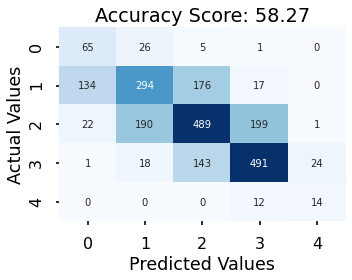

In [88]:
accuracy_RF = round(SelectedRFModel.score(X_st_train,y_train_st) * 100, 2)
print(accuracy_RF)
RFy_pred = SelectedRFModel.predict(X_st_test)
accuracy_test_RF = round(metrics.accuracy_score(y_test,RFy_pred) * 100, 2)
print(accuracy_test_RF)
confusion_matrix(y_test,RFy_pred)
print(classification_report(y_test,RFy_pred))
plt.subplots(figsize=(5,4))
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,RFy_pred)), annot = True, cbar=False,cmap='Blues',fmt='g')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.title('Accuracy Score: {0}'.format(accuracy_test_RF, size = 15))
plt.tight_layout()
plt.show()

### Xgboost

In [241]:
model_xgb=XGBClassifier(random_state=42)
model_xgb.fit(X_st_train,y_train_st)
print("Accuracy of train dataset={}".format(model_xgb.score(X_st_train,y_train_st)))
print("Accuracy of test dataset={}".format(model_xgb.score(X_st_test,y_test)))

Accuracy of train dataset=0.9627601314348302
Accuracy of test dataset=0.6757105943152455


In [244]:
param_grid_xgb = {'max_depth': [2,3,4,5],'min_child_weight': [0.01,0.1,0.5],\
                  'gamma':[i/10.0 for i in range(3,6)],  'subsample':[i/10.0 for i in range(6,11)],\
                  'colsample_bytree':[i/10.0 for i in range(6,11)],'n_estimators': [100, 200, 300]}
xgb = GridSearchCV(estimator = model_xgb, param_grid = param_grid_xgb, cv = 3, n_jobs = -1, verbose = 2)
xgb.fit(X_st_train,y_train_st)
print("Accuracy::{}".format(xgb.best_score_))
print("Best Hyperparameters::\n{}".format(xgb.best_params_))

Fitting 3 folds for each of 2700 candidates, totalling 8100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 23.3min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 40.9min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed: 62.0min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed: 86.4min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed: 118.7min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed: 158.2min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed: 205.7min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 256.9min
[Parallel(n_jobs=-1)]: Done 4885 tasks      | elapsed: 322.6min
[Parallel(n_jobs=-1)]: Done 5816 tasks      | elapsed: 393.1min
[Parallel(n_jobs=-1)]: Done 6829 tasks      | elapsed: 475.2min
[Parallel(n_jobs=-1)]: Done 7922 tasks      | elapsed: 570.0min
[Parallel(n_jobs=-1)]: Done 8100 out of

Accuracy::0.8031520019471827
Best Hyperparameters::
{'colsample_bytree': 0.9, 'gamma': 0.3, 'max_depth': 5, 'min_child_weight': 0.01, 'n_estimators': 300, 'subsample': 0.7}


In [251]:
xgb_final=XGBClassifier(n_estimators=300,subsample=0.7,colsample_bytree=0.9,gamma=0.3,max_depth=5,min_child_weight=0.01,random_state=42)

xgb_final.fit(X_st_train,y_train_st)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weight=0.01, missing=nan, monotone_constraints='()',
              n_estimators=300, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=0.7,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [252]:
y_pred_xgb=xgb_final.predict(X_st_test)
print("Accuracy of train dataset={}".format(xgb_final.score(X_st_train,y_train_st)))
print("Accuracy of test dataset={}".format(xgb_final.score(X_st_test,y_test)))

Accuracy of train dataset=0.9928197639041012
Accuracy of test dataset=0.6761412575366064


Feature importance: 
[['eps' '0.016236488']
 ['duration' '0.018766617']
 ['watched' '0.018128807']
 ['watching' '0.04916192']
 ['wantWatch' '0.051988263']
 ['dropped' '0.021214945']
 ['Action' '0.014784889']
 ['Adventure' '0.018576186']
 ['Drama' '0.018211083']
 ['Fantasy' '0.022862243']
 ['Shounen' '0.015953317']
 ['Based on a Manga' '0.027107947']
 ['Romance' '0.022962704']
 ['School Life' '0.011531208']
 ['Supernatural' '0.019168455']
 ['Original Work' '0.014404031']
 ['Comedy' '0.016717818']
 ['Superpowers' '0.008209527']
 ['Sci Fi' '0.019852431']
 ['Mecha' '0.0105566075']
 ['Seinen' '0.00966272']
 ['Slice of Life' '0.017160691']
 ['Family Friendly' '0.010978168']
 ['Magic' '0.020646939']
 ['Based on a Light Novel' '0.016075982']
 ['Non-Human Protagonists' '0.014397739']
 ['Ecchi' '0.023608878']
 ['Short Episodes' '0.02124015']
 ['Animal Protagonists' '0.020683594']
 ['CG Animation' '0.011461677']
 ['Shorts' '0.013660552']
 ['Animal Abuse' '0.0084986435']
 ['Mature Themes' '0.02078

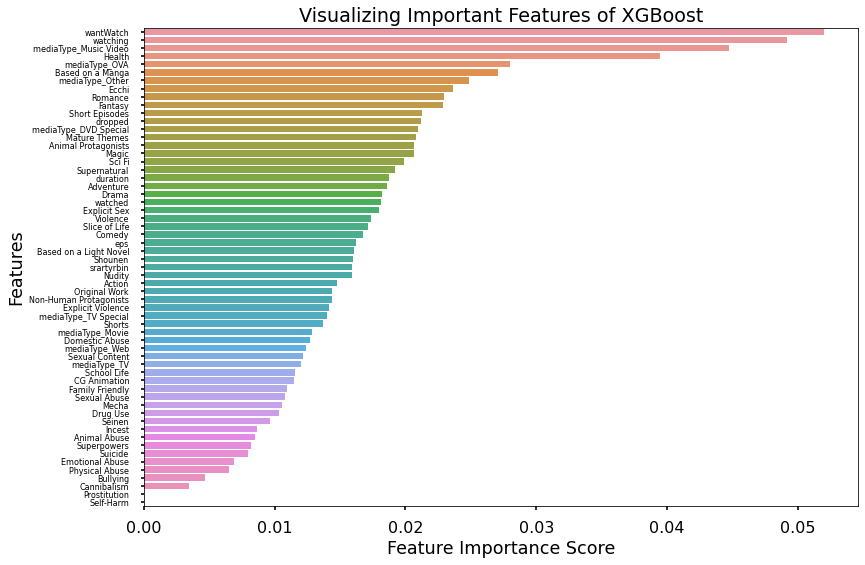

In [254]:
print("Feature importance: ")
print(np.array([X.columns.values.tolist(), list(xgb_final.feature_importances_)]).T)
feature_imp_xgb = pd.Series(xgb_final.feature_importances_, index = X.columns).sort_values(ascending=False)
sns.barplot(x=feature_imp_xgb,y=feature_imp_xgb.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.yticks(fontsize=8)
plt.title("Visualizing Important Features of XGBoost")
plt.show()

              precision    recall  f1-score   support

           1       0.42      0.36      0.39        97
           2       0.64      0.62      0.63       621
           3       0.65      0.68      0.66       901
           4       0.79      0.77      0.78       677
           5       0.52      0.46      0.49        26

    accuracy                           0.68      2322
   macro avg       0.60      0.58      0.59      2322
weighted avg       0.68      0.68      0.68      2322



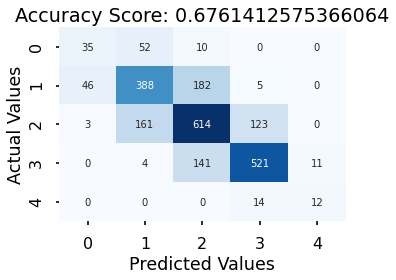

In [256]:
confusion_matrix(y_test,y_pred_xgb)
print(classification_report(y_test,y_pred_xgb))
plt.subplots(figsize=(5,4))
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_pred_xgb)), annot = True, cbar=False,cmap='Blues',fmt='g')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.title('Accuracy Score: {0}'.format(xgb_final.score(X_st_test,y_test), size = 15))
plt.tight_layout()
plt.show()